In [2]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import random

from statistics import mean
from matplotlib import style

In [3]:
# Generate sample dataset
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

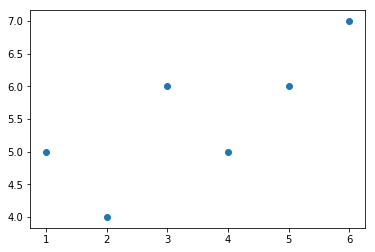

In [4]:
# Visualize the dataset
plt.scatter(xs, ys)
plt.show()

In [5]:
# Define best fit slope (m) and intercept (b)
def best_fit_slope_and_intercept(xs, ys):
    m = ((mean(xs)*mean(ys) - mean(xs*ys)) / 
         (mean(xs)*mean(xs) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs, ys)

In [6]:
# Check result
print(m, b)

0.428571428571 4.0


In [7]:
# Create regression line (predicted ys)
regression_line = [m*x + b for x in xs]

In [8]:
# Try a prediction
predict_x = 8
predict_y = m*predict_x + b

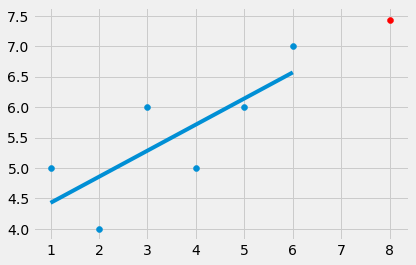

In [9]:
# Plot the line
style.use('fivethirtyeight')
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='red')
plt.plot(xs, regression_line)
plt.show()

In [10]:
# Compute R-squared (Coefficient of Determination)
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    # Array of mean ys
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.584415584416


In [16]:
# Create another dataset
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

xs, ys = create_dataset(40, 10, 2, correlation='pos')

In [19]:
# Create a regression line with the new dataset
m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = [m*x + b for x in xs]

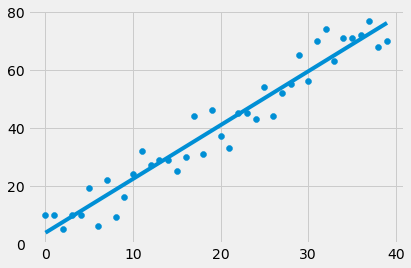

In [21]:
# Plot a regression line with the new dataset
style.use('fivethirtyeight')
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [23]:
# Compute R-squared
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.938119721068
